In [1]:
import tensorflow as tf 
import cv2  
import os
import matplotlib.pyplot as plt
import numpy as np 

2022-12-29 08:33:35.145570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
img_array = cv2.imread("/Users/hadil/Desktop/training/angry/angryitraining17.jpeg")

In [3]:
img_array.shape 

(141, 138, 3)

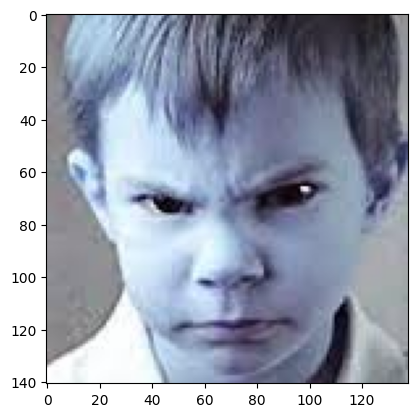

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "/Users/hadil/Desktop/training"

In [6]:
Classes =["angry","disgust","fear","happy","neutral","sad","surprise"] 

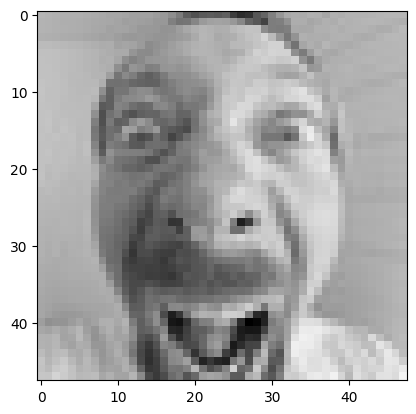

In [7]:
for category in Classes: # Read all of the images
 
    path = os.path.join(Datadirectory,category) 
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

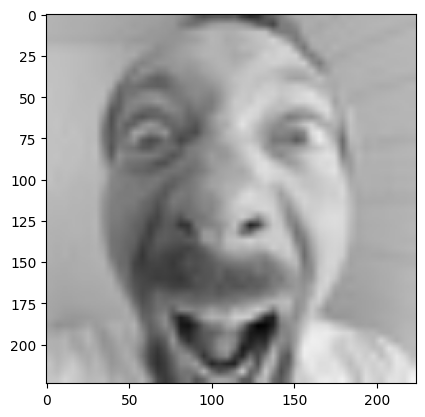

In [8]:
img_size= 224 ## imgaNet => 224 x 224  #Change the size of the image
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape 

(224, 224, 3)

In [11]:

training_Data = [] ##data array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

29149


In [14]:
import random 
random.shuffle(training_Data)

In [15]:
x = [] #data
y = [] #label

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
    
    
    
x = np.array(x).reshape(-1, img_size, img_size, 3)

In [16]:
x.shape

(29149, 224, 224, 3)

In [17]:
x= x/255.0; 

In [18]:
type(y)

list

In [19]:
y= np.array(y)

In [20]:
y.shape

(29149,)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNetV2() 

2022-12-29 08:39:36.804484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [24]:
base_input = model.layers[0].input

In [25]:
base_output = model.layers[-2].output

In [26]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [27]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [28]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [29]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [30]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [31]:
new_model.fit(x,y, epochs=8)

Epoch 1/8
911/911 [==============================] - 4792s 5s/step - loss: 1.2501 - accuracy: 0.5285
Epoch 2/8
911/911 [==============================] - 4752s 5s/step - loss: 1.0760 - accuracy: 0.5960
Epoch 3/8
911/911 [==============================] - 4434s 5s/step - loss: 0.9907 - accuracy: 0.6318
Epoch 4/8
911/911 [==============================] - 4522s 5s/step - loss: 0.9379 - accuracy: 0.6508
Epoch 5/8
911/911 [==============================] - 5165s 6s/step - loss: 0.8836 - accuracy: 0.6727
Epoch 6/8
911/911 [==============================] - 3808s 4s/step - loss: 0.8373 - accuracy: 0.6894
Epoch 7/8
911/911 [==============================] - 3769s 4s/step - loss: 0.7853 - accuracy: 0.7087
Epoch 8/8
911/911 [==============================] - 4556s 5s/step - loss: 0.7268 - accuracy: 0.7340


In [32]:
##new_model.fit(x,y, epochs=6)

In [32]:
##new_model.save('Final2_model_95p07.h5')

In [31]:
new_model = tf.keras.models.load_model('Final2_model_95p07.h5')

In [32]:
frame = cv2.imread("/Users/hadil/Desktop/happy.jpg")

In [33]:
frame.shape

(768, 564, 3)

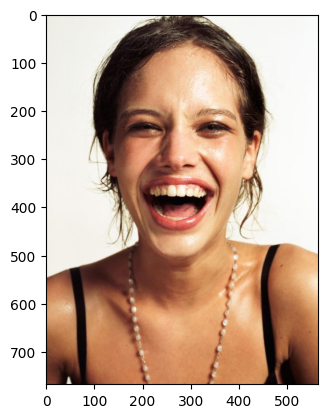

In [34]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [35]:
faceCascade = cv2.CascadeClassifier('/Users/hadil/Desktop/haarcascade_frontalface_default.xml')

In [36]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [37]:
gray.shape

(768, 564)

In [38]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

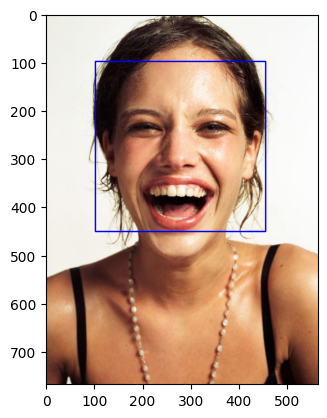

In [39]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 

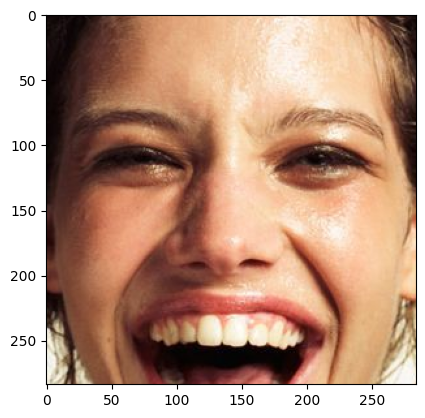

In [40]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [41]:
final_image =cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image =final_image/255.0

In [42]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 2s 2s/step


In [43]:
predictions[0]

array([7.15492934e-05, 8.10398137e-10, 1.16571275e-04, 8.71679187e-01,
       1.27335280e-01, 7.12688488e-05, 7.26158905e-04], dtype=float32)

In [44]:
np.argmax(predictions)

3

In [91]:
import cv2             
import numpy as np

path = "/Users/hadil/Desktop/haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)

img = np.zeros ( (500, 500))

text = "Some text in a box!"

(text_width,text_height) = cv2.getTextSize(text,font,fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED) 
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)


cap = cv2.VideoCapture (0)

if not cap.isOpened():
  cap = cv2.VideoCapture (0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray =cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        
        
        if len(facess) == 0:
               print("face not detected")
        else:
            for (ex, ey, ew,eh) in facess:
                face_roi =roi_color[ey: ey+eh, ex: ex+ew]
                   
    final_image =cv2.resize(face_roi, (224,224))
    final_image =np.expand_dims(final_image,axis =0)
    final_image =final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    predictions = new_model.predict(final_image)
       
    font_scale = 1.5
    font= cv2.FONT_HERSHEY_PLAIN
       
    if (np.argmax (predictions)==0): 
        status = "Angry"
        Message ="Stay away from what makes you angry, nothing is worth it"
        x1, y1, w1, h1 = 0,0,175,75
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2) 
        cv2. putText(frame, Message, (100, 150), font, 3,(0, 0, 255),2, cv2. LINE_4) 
        cv2. rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
      
    elif (np.argmax(predictions)==1):
           status = "Disgust"
           Message = "Look away from what disgusts you"
           x1, y1, w1, h1 = 0,0,175,75
           cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
           cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2) 
           cv2.putText(frame, Message, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4) 
           cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
         
    elif (np.argmax (predictions)==2) :
        status = "Fear"
        Message = "believe in yourself,you're strong"
        x1, y1, w1, h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2) 
        cv2.putText(frame, Message, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(predictions)==3 ):
        status = "Happy" 
        Message ="you have a beautiful smile" 
        x1, y1, w1, h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2) 
        cv2.putText(frame, Message, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(predictions)==5):
        status = "Sad" 
        Message ="nothing stay the same so don't be sad"
        x1, y1, w1, h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2) 
        cv2.putText(frame, Message, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(predictions)==6 ):
        status = "Surprise" 
        Message ="calm down,everything will be ok"
        x1, y1, w1, h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2) 
        cv2.putText(frame, Message, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    else:  
        
        status = "Neutral" 
        Message = "hope you have great day"
        x1, y1, w1, h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2) 
        cv2.putText(frame, Message, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        
    cv2.imshow( 'Face Emotion Recognition', frame) 
    if cv2.waitKey(1) & 0xFF == ord('q'):
           break
cap.release ()
cv2.destroyAl1Windows ()

1/1 [==============================] - 0s 79ms/step
face not detected
1/1 [==============================] - 0s 82ms/step
face not detected
face not detected
1/1 [==============================] - 0s 71ms/step
face not detected
face not detected
face not detected
1/1 [==============================] - 0s 73ms/step
face not detected
1/1 [==============================] - 0s 71ms/step
face not detected
1/1 [==============================] - 0s 80ms/step
face not detected
face not detected
1/1 [==============================] - 0s 74ms/step
face not detected
1/1 [==============================] - 0s 125ms/step
face not detected
face not detected
1/1 [==============================] - 0s 72ms/step
face not detected
1/1 [==============================] - 0s 76ms/step
face not detected
1/1 [==============================] - 0s 66ms/step
face not detected
face not detected
1/1 [==============================] - 0s 67ms/step
face not detected
face not detected
face not detected
1/1 [==========

KeyboardInterrupt: 